In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# === 1. 读取 Excel 文件 ===
df = pd.read_excel("/data/lzx/bingli/TransMIL-main/1-461.xlsx")

# === 2. 转换 TRG 为二分类 ===
def convert_trg_to_binary(x):
    if x in [0, 1]:
        return 0
    elif x in [2,3]:
        return 1
    else:
        return -1  # 处理异常值

df["new_label"] = df["NAC前Lauren分型（0=NA，1=肠型，2=弥漫型，3=混合型）"].apply(convert_trg_to_binary)

# 只保留合法标签的数据
filtered_df = df[df["new_label"] != -1]

# === 3. 使两个类别样本数量相同 ===
min_count = min(filtered_df["new_label"].value_counts().values)

# 采样每个类别的最小样本数
balanced_df = pd.concat([
    filtered_df[filtered_df["new_label"] == 0].sample(min_count, random_state=42),
    filtered_df[filtered_df["new_label"] == 1].sample(min_count, random_state=42)
])

# === 4. 按 7:1.5:1.5 比例划分训练/验证/测试集 ===
train_df, temp_df = train_test_split(
    balanced_df,
    test_size=0.3, 
    random_state=50, 
    stratify=balanced_df["new_label"]
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5, 
    random_state=42, 
    stratify=temp_df["new_label"]
)

# === 5. 生成新的 DataFrame，按指定列顺序写出 CSV ===
new_df = pd.DataFrame({
    "序号": range(1, len(balanced_df) + 1),
    "train": train_df["编号"].tolist() + [None] * (len(val_df) + len(test_df)),
    "train_label": train_df["new_label"].tolist() + [None] * (len(val_df) + len(test_df)),
    "val": [None] * len(train_df) + val_df["编号"].tolist() + [None] * len(test_df),
    "val_label": [None] * len(train_df) + val_df["new_label"].tolist() + [None] * len(test_df),
    "test": [None] * (len(train_df) + len(val_df)) + test_df["编号"].tolist(),
    "test_label": [None] * (len(train_df) + len(val_df)) + test_df["new_label"].tolist()
})

# 导出 CSV 文件
new_df.to_csv("new_balanced_split_data.csv", index=False, encoding="utf-8-sig")

print("已生成 new_balanced_split_data.csv，样本数量已平衡，第一行为：序号,train,train_label,val,val_label,test,test_label")

已生成 new_balanced_split_data.csv，样本数量已平衡，第一行为：序号,train,train_label,val,val_label,test,test_label


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 假设您的 Excel 文件路径为 "/data/lzx/bingli/TransMIL-main/1-461.xlsx"
df = pd.read_excel("/data/lzx/bingli/TransMIL-main/1-461.xlsx")
# 首先，将数据集划分为训练集（70%）和临时集（30%）
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,  # 临时集占30%
    random_state=50,  # 固定随机种子以便复现
    shuffle=True  # 随机打乱数据
)

# 然后，将临时集再划分为验证集（15%）和测试集（15%）
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,  # 验证集和测试集各占临时集的一半，即15%
    random_state=42,
    shuffle=True
)
# 统计各部分大小
train_count = len(train_df)
val_count = len(val_df)
test_count = len(test_df)
total_count = train_count + val_count + test_count

# 建立空的 DataFrame（先建好所有行、列）
new_df = pd.DataFrame(
    index=range(total_count),
    columns=["序号", "train", "train_label", "val", "val_label", "test", "test_label"]
)

# 训练集部分：行索引 0 ~ train_count-1
new_df.loc[0:train_count-1, "序号"] = range(1, train_count+1)
new_df.loc[0:train_count-1, "train"] = train_df["编号"].values
new_df.loc[0:train_count-1, "train_label"] = train_df["NAC前Lauren分型（0=NA，1=肠型，2=弥漫型，3=混合型）"].values

# 验证集部分：行索引 train_count ~ train_count+val_count-1
new_df.loc[train_count:train_count+val_count-1, "序号"] = range(train_count+1, train_count+val_count+1)
new_df.loc[train_count:train_count+val_count-1, "val"] = val_df["编号"].values
new_df.loc[train_count:train_count+val_count-1, "val_label"] = val_df["NAC前Lauren分型（0=NA，1=肠型，2=弥漫型，3=混合型）"].values

# 测试集部分：行索引 train_count+val_count ~ total_count-1
new_df.loc[train_count+val_count:total_count-1, "序号"] = range(train_count+val_count+1, total_count+1)
new_df.loc[train_count+val_count:total_count-1, "test"] = test_df["编号"].values
new_df.loc[train_count+val_count:total_count-1, "test_label"] = test_df["NAC前Lauren分型（0=NA，1=肠型，2=弥漫型，3=混合型）"].values
# 导出新的 CSV 文件
new_df.to_csv("new_split_data.csv", index=False, encoding="utf-8-sig")

print("已生成 new_split_data.csv，第一行为：序号,train,train_label,val,val_label,test,test_label")


已生成 new_split_data.csv，第一行为：序号,train,train_label,val,val_label,test,test_label


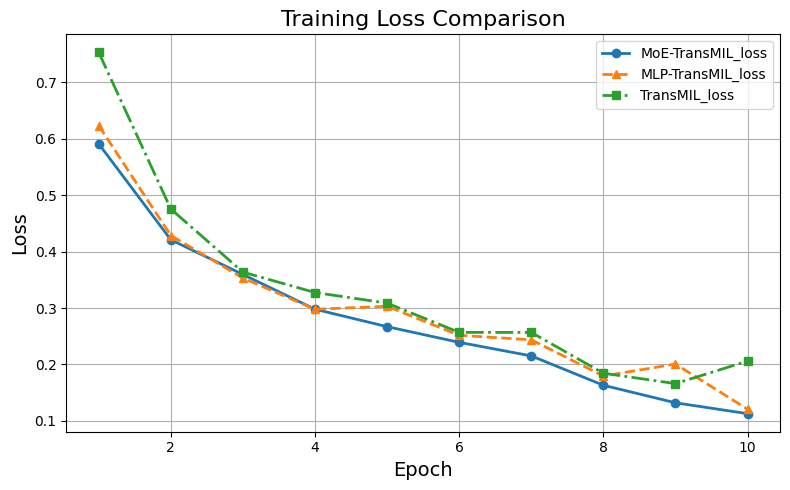

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义你的三列数据（每行对应一次训练迭代或一个epoch）
data = [
    [0.59073925, 0.623108923, 0.752695441],
    [0.420857757, 0.428395003, 0.475365371],
    [0.359369308, 0.35309431,  0.363580137],
    [0.297912002, 0.297746539, 0.327482879],
    [0.266993493, 0.303138584, 0.308633268],
    [0.23919566,  0.251674473, 0.256869882],
    [0.21519433,  0.243683562, 0.256780624],
    [0.163211331, 0.179645374, 0.184562728],
    [0.13216427,  0.200704992, 0.166095436],
    [0.112918928, 0.120764412, 0.206073999]
]

# 将数据转换为 DataFrame，并设置列名称为：MoE-TransMIL_loss, MLP-TransMIL_loss, TransMIL
df = pd.DataFrame(data, columns=['MoE-TransMIL_loss', 'MLP-TransMIL_loss', 'TransMIL_loss'])

# 定义 x 轴（epoch），假设每行数据对应一个 epoch，从 1 开始
epochs = range(1, len(df) + 1)

# 创建图像并绘制各条曲线
plt.figure(figsize=(8, 5))
plt.plot(epochs, df['MoE-TransMIL_loss'], label='MoE-TransMIL_loss', marker='o', linestyle='-', linewidth=2)
plt.plot(epochs, df['MLP-TransMIL_loss'], label='MLP-TransMIL_loss', marker='^', linestyle='--', linewidth=2)
plt.plot(epochs, df['TransMIL_loss'], label='TransMIL_loss', marker='s', linestyle='-.', linewidth=2)

# 设置坐标轴标签和标题
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Training Loss Comparison", fontsize=16)

# 添加图例和网格，并调整布局
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

# 保存图片为PNG格式，300 dpi
plt.savefig("loss_compare.png", dpi=300)
plt.show()


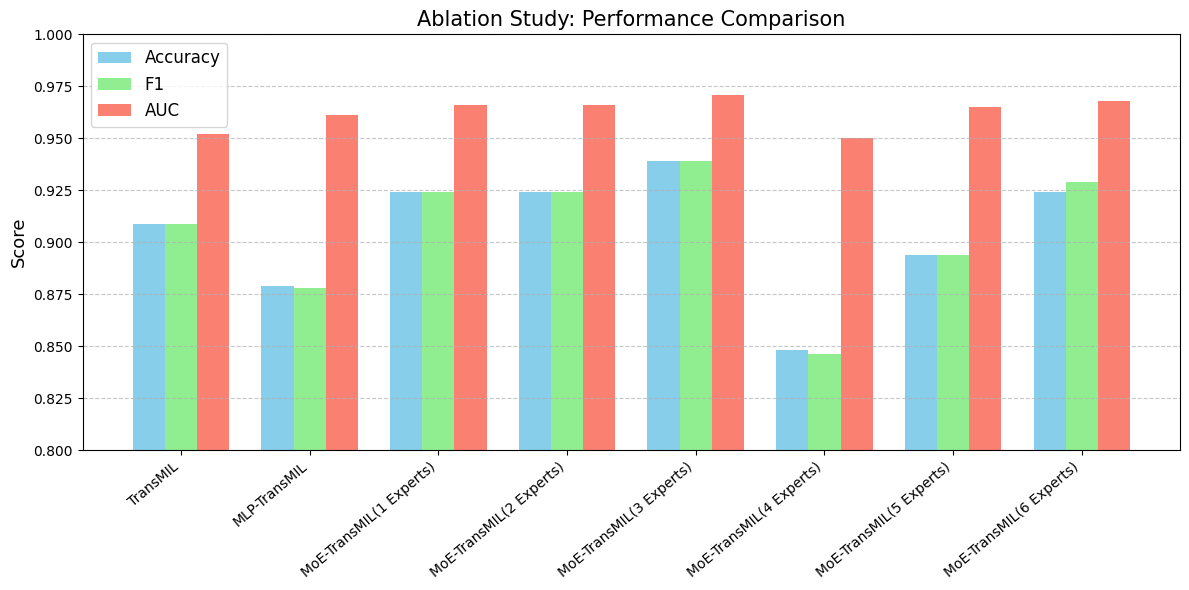

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 准备数据：8 个方法（行），每个方法有 3 个指标：Accuracy、F1、AUC
labels = [
    "TransMIL",
    "MLP-TransMIL",
    "MoE-TransMIL(1 Experts)",
    "MoE-TransMIL(2 Experts)",
    "MoE-TransMIL(3 Experts)",
    "MoE-TransMIL(4 Experts)",
    "MoE-TransMIL(5 Experts)",
    "MoE-TransMIL(6 Experts)"
]

acc = [0.909, 0.879, 0.924, 0.924, 0.939, 0.848, 0.894, 0.924]
f1  = [0.909, 0.878, 0.924, 0.924, 0.939, 0.846, 0.894, 0.929]
auc = [0.952, 0.961, 0.966, 0.966, 0.971, 0.950, 0.965, 0.968]

# 2. 生成柱状图
x = np.arange(len(labels))  # x 轴刻度
width = 0.25                # 每组柱子的宽度

plt.figure(figsize=(12, 6))

# 三个指标分三组柱子
plt.bar(x - width, acc, width=width, label='Accuracy', color='skyblue')
plt.bar(x,       f1,  width=width, label='F1',       color='lightgreen')
plt.bar(x + width, auc, width=width, label='AUC',    color='salmon')

# 3. 设置 x 轴与刻度
plt.xticks(x, labels, rotation=40, ha='right')  # 旋转标签避免重叠
plt.ylim([0.8, 1.0])                            # 视情况调整 y 轴范围
plt.ylabel("Score", fontsize=13)
plt.title("Ablation Study: Performance Comparison", fontsize=15)

# 4. 添加网格、图例并布局
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# 5. 保存并显示
plt.savefig("ablation_bar.png", dpi=300)
plt.show()
